# Nibabel Basics Notebook
### *Learning how to load and view MRI scans*

## Import Libraries
We need nibabel for MRI files and matplotlib for plotting.

In [3]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

## Upload an MRI File (.nii.gz)
Upload any NIfTI file.

## Load MRI File
Nibabel loads the 3D MRI volume as a NumPy array.

In [5]:
file_path = r"C:\Users\vithu\OneDrive\Desktop\Brain_Tumor_Segmentation_BCP\Week_2\Python_libraries\Nibabel\MR_Gd.nii.gz"
mri = nib.load(file_path).get_fdata()
print('MRI Shape:', mri.shape)

MRI Shape: (176, 188, 144)


## Visualize a Middle Slice
MRI is 3D. We view one slice at a time.

(np.float64(-0.5), np.float64(187.5), np.float64(175.5), np.float64(-0.5))

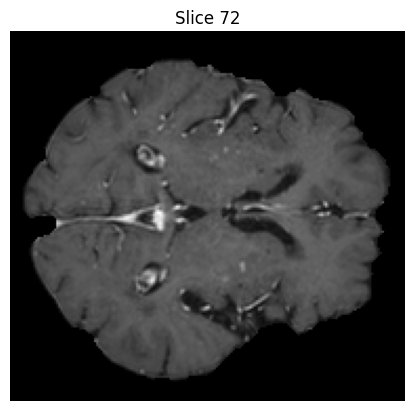

In [24]:
slice_index = mri.shape[2] // 2
plt.imshow(mri[:, :, slice_index], cmap='gray')
plt.title(f'Slice {slice_index}')
plt.axis('off')

## Extract All Slices
Convert 3D MRI into 2D slices.

In [25]:
slices = [mri[:, :, i] for i in range(mri.shape[2])]
len(slices)

144

## Normalize a Slice
Normalization improves contrast.

(np.float64(-0.5), np.float64(187.5), np.float64(175.5), np.float64(-0.5))

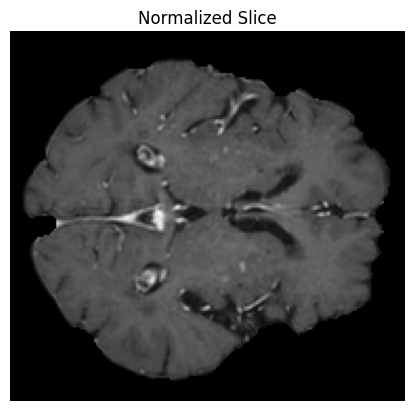

In [8]:
norm_slice = (mri[:, :, slice_index] - np.min(mri)) / (np.max(mri) - np.min(mri))
plt.imshow(norm_slice, cmap='gray')
plt.title('Normalized Slice')
plt.axis('off')

## Resize Slice (Used in ML Preprocessing)

c:\Users\vithu\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

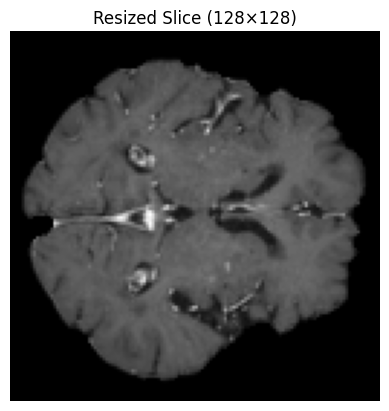

In [11]:
import tensorflow as tf
resized = tf.image.resize(norm_slice[..., None], (128, 128))
plt.imshow(resized.numpy().squeeze(), cmap='gray')
plt.title('Resized Slice (128×128)')
plt.axis('off')

## **Exercises**
1. Load **another** MRI file and visualize 5 slices.
2. Write a function `plot_slices(volume, indices)` to plot given slice numbers.
3. Create a function to normalize **all** slices and return the new array.


In [40]:
path=r"C:\Users\vithu\OneDrive\Desktop\Brain_Tumor_Segmentation_BCP\Week_2\Python_libraries\Nibabel\CT_Philips.nii.gz"
file=nib.load(path).get_fdata()
file.shape

(185, 232, 256)

In [ ]:
slices=[file[:,:,i] for i in range(file.shape[2])]
plt.imshow(slices[122],cmap="grey")
plt.axis("off")

In [ ]:
for i in range(100,200,20):
    plt.imshow(slices[i],cmap="grey")
    plt.axis("off")
    plt.show()


In [ ]:
def plot_slices(volume,indices):
    for i in indices:
        plt.imshow(volume[:,:,i],cmap="grey")
        plt.axis("off")
        plt.show()
    return None

plot_slices(file,[20,45,89])

In [69]:
print(np.min(slices))

-1024.0


In [ ]:
def normalize(slices):
    norm=[slices[i]-np.min(slices)/(np.max(slices)-np.min(slices)) for i in range(len(slices))]
    return norm

norm_slices=normalize(slices)

In [76]:
def plot_slices_array(arr,indices):
    for i in indices:
        plt.imshow(arr[i],cmap="grey")
        plt.axis("off")
        plt.show()
    return None

In [ ]:
plot_slices_array(norm_slices,[20,45,89])